# 1. Scraping historical closing price of BTC and ETH from CoinMarketCap from 01-01-2018 till today. 

Hints:- the URLs are: 
https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20160101&end=20190619 
https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20160101&end=20190619

In [12]:
from bokeh.io import output_notebook
output_notebook()
from cmc import coinmarketcap
from datetime import datetime
import matplotlib.pyplot as plt

import pylab
crypto = ['bitcoin','ethereum']
start_date, end_date = datetime(2018,1,1), datetime(2019,7,7)
df_cryptos = coinmarketcap.getDataFor(crypto, start_date, end_date, fields = ['Close'])
print(df_cryptos)

#pylab.rcParams['figure.figsize'] = (15, 9)
#df_cryptos.plot(secondary_y = ["ethereum"] ,grid = True)
#df_cryptos["2016-09-09":"2017-09-09"].plot()


Loading BokehJS ...

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.35it/s]


             bitcoin ethereum
               Close    Close
Date                         
2018-01-01  13657.20   772.64
2018-01-02  14982.10   884.44
2018-01-03  15201.00   962.72
2018-01-04  15599.20   980.92
2018-01-05  17429.50   997.72
2018-01-06  17527.00  1041.68
2018-01-07  16477.60  1153.17
2018-01-08  15170.10  1148.53
2018-01-09  14595.40  1299.74
2018-01-10  14973.30  1255.82
2018-01-11  13405.80  1154.93
2018-01-12  13980.60  1273.20
2018-01-13  14360.20  1396.42
2018-01-14  13772.00  1366.77
2018-01-15  13819.80  1291.92
2018-01-16  11490.50  1053.69
2018-01-17  11188.60  1014.25
2018-01-18  11474.90  1036.28
2018-01-19  11607.40  1039.10
2018-01-20  12899.20  1155.15
2018-01-21  11600.10  1049.58
2018-01-22  10931.40  1003.26
2018-01-23  10868.40   986.23
2018-01-24  11359.40  1058.78
2018-01-25  11259.40  1056.03
2018-01-26  11171.40  1055.17
2018-01-27  11440.70  1107.07
2018-01-28  11786.30  1246.01
2018-01-29  11296.40  1182.36
2018-01-30  10106.30  1071.13
...       

# 2. Plotting the price of these two coins

In [16]:
plt.plot(df_cryptos['bitcoin'], 'g')
plt.plot(df_cryptos['ethereum'], 'y')
plt.legend(['bitcoin closing price','ethereum clossing price'])
plt.show()

# 3. the stock’s return since the beginning of the period of interest

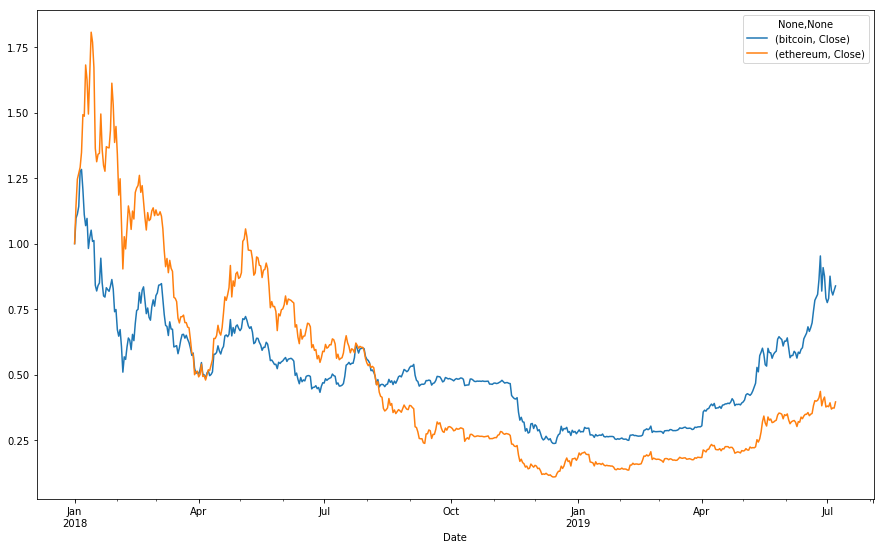

In [14]:
df_cryptos = df_cryptos.apply(lambda x: x / x[0])
df_cryptos.plot()

# 4. Compute and plot the daily return for the time period

Calculate Daily Return
***********************
Find in the historical prices section the stock’s closing price for any two consecutive days. For example, assume a stock’s closing price was $36.75 yesterday and that its closing price was $35.50 the previous day. Subtract the previous day’s closing price from the most recent day’s closing price. In this example, subtract $35.50 from $36.75 to get $1.25.

Divide your Step 4 result by the previous day’s closing price to calculate the daily return. Multiply this result by 100 to convert it to a percentage. Continuing with the example, divide $1.25 by $35.50 to get 0.035. Multiply 0.035 by 100 to get a 3.5 percent return for that day. This means that the stock’s price increased by 3.5 percent over the previous day’s closing price

In [17]:
print(len(df_cryptos['bitcoin']))
dailyReturn = []
for p in range(1,len(df_cryptos['bitcoin'])):
    dailyReturn.append(round((df_cryptos['bitcoin']['Close'][p] - df_cryptos['bitcoin']['Close'][p-1]),2)/df_cryptos['bitcoin']['Close'][p-1])
plt.plot(dailyReturn,'b')
plt.title("Daily Return")
plt.show()

There is another way to model the growth of a stock: with log differences.

change_t = price_t - price_t-1 

(Here, log is the natural log, and our definition does not depend as strongly on whether we use 
log(price_t) - log(price_t-1) or log(price_t+1) - log(price_t).)
The advantage of using log differences is that this difference can be interpreted as the percentage change 
in a stock but does not depend on the denominator of a fraction.

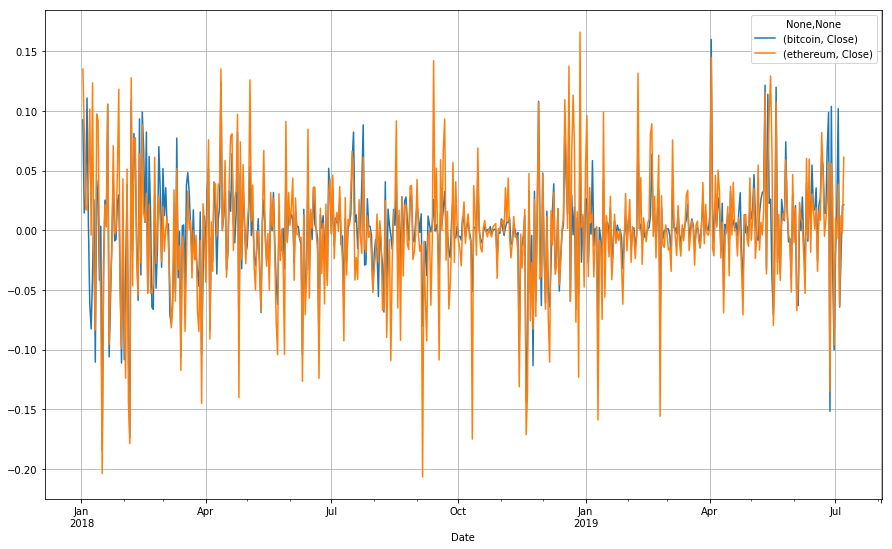

In [6]:
import numpy as np
 
df_cryptos_change = df_cryptos.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
df_cryptos_change.head()
df_cryptos_change.plot(grid= True)

# 5. Compute and plot the 7-day and 30-day moving average of the closing prices of these two coins

In [18]:
sevenDMA_bitcoin = []
sevenDMA_ethereum = []
for b in range(0,len(df_cryptos['bitcoin'])):
    if(b%7 == 0):
        sum_bitcoin = 0
        sum_ethereum = 0
        for i in range(0,7):
            sum_bitcoin += df_cryptos['bitcoin']['Close'][b-i]
            sum_ethereum += df_cryptos['ethereum']['Close'][b-i]
        sevenDMA_bitcoin.append(round(sum_bitcoin,2))
        sevenDMA_ethereum.append(round(sum_ethereum,2))
#print(sevenDMA, len(sevenDMA))
#plt.plot(sevenDMA_bitcoin,'b')
#plt.plot(sevenDMA_ethereum,'y')
#plt.title("7-day Moving Average")
#plt.legend(["bitcoin","ethereum"])
#plt.show()

In [19]:
sevenDMA_bitcoin = []
sevenDMA_ethereum = []
for b in range(0,len(df_cryptos['bitcoin'])):
    if(b%30 == 0):
        sum_bitcoin = 0
        sum_ethereum = 0
        for i in range(0,30):
            sum_bitcoin += df_cryptos['bitcoin']['Close'][b-i]
            sum_ethereum += df_cryptos['ethereum']['Close'][b-i]
        sevenDMA_bitcoin.append(round(sum_bitcoin,2))
        sevenDMA_ethereum.append(round(sum_ethereum,2))
#print(sevenDMA, len(sevenDMA))
#plt.plot(sevenDMA_bitcoin,'b')
#plt.plot(sevenDMA_ethereum,'y')
#plt.title("30-day Moving Average")
#plt.legend(["bitcoin","ethereum"])
#plt.show()

pandas provides functionality for easily computing moving averages.

Text(0.5,1,'7-day Moving Average')

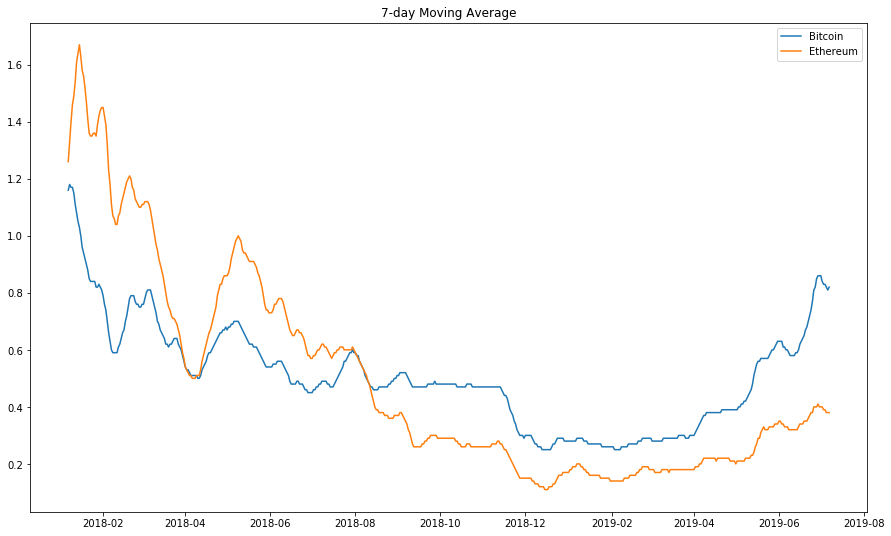

In [20]:
df_cryptos = np.round(df_cryptos.rolling(window = 7, center = False).mean(), 2)
#pandas_candlestick_ohlc(df_cryptos.loc['2018-01-04':'2018-08-07',:], otherseries = "20d")
plt.plot(df_cryptos)
plt.legend(["Bitcoin","Ethereum"])
plt.title("7-day Moving Average")

# 6. Compute and plot the correlation coefficients of the closing prices between these two coins for the last 12 months